<a href="https://colab.research.google.com/github/v4vishalchauhan/Machine_learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle

# !kaggle datasets list


!kaggle datasets download -d hesh97/titanicdataset-traincsv

Saving kaggle.json to kaggle.json
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 19.3MB/s]


In [0]:
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import missingno as msno   #for missing values plotting
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score,r2_score
import warnings
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
from zipfile import ZipFile
zip=ZipFile('titanicdataset-traincsv.zip','r')
zip.extractall()
    

In [0]:
data=pd.read_csv('train.csv')
# print(data.shape)
data2=data
    

# msno.matrix(data)
data2=data2.drop('Cabin',axis=1)   #too many missing values
data2=data2.drop('Name',axis=1)   #right now not handling the text
data2=data2.drop('Ticket',axis=1) #no text handling now
data2.Embarked.fillna('S',inplace=True)  # frequency of S is highest 

data2.Age.fillna(np.mean(data2.Age),inplace=True) #handling outliers using mean because median is nan


lencoder=LabelEncoder()  #for sex column
oencoder=OneHotEncoder() #for Embarked column
data2.Sex=lencoder.fit_transform(data2.Sex)
Embarked=np.array(data2.Embarked).reshape(len(data2.Embarked),1)
# print(Embarked.shape)
Embarked=lencoder.fit_transform(Embarked)
data2=data2.drop('Embarked',axis=1)

std=StandardScaler()

data2['Embarked']=Embarked

y=data2.Survived
y=np.array(y).reshape(len(y),1)   
data2=data2.drop('Survived',axis=1)
# msno.matrix(data)
x=data2
x=std.fit_transform(x)   #without standardization out accuracy will get decreased
# bt=x.corr()               #features are not correlated to each other
# print(bt)
# sns.heatmap(bt,annot=True)
# print(data.head(3))
# msno.matrix(data)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# print(data.head(3))
# msno.matrix(data)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **EDA**

<!-- # **EDA** -->

38.38383838383838% People survived


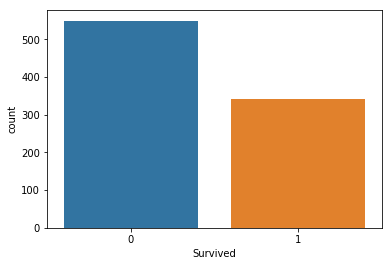

In [0]:
sns.countplot(x='Survived',data=data)
print("{}% People survived".format(((data.Survived==1).sum()/len(data.Survived))*100))


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


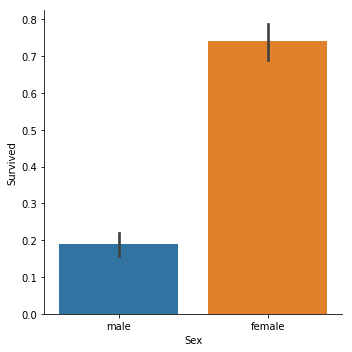

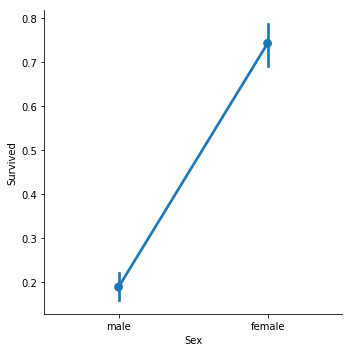

In [0]:

sns.factorplot(x='Sex',y='Survived',data=data,kind='bar')

sns.factorplot(x='Sex',y='Survived',data=data,kind='point')
print(pd.crosstab(data.Survived,data.Sex,margins=True))

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


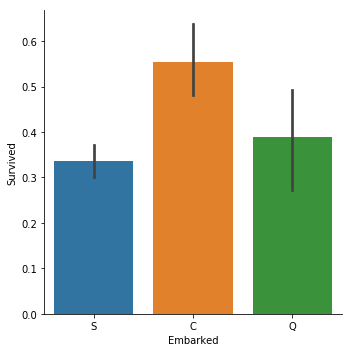

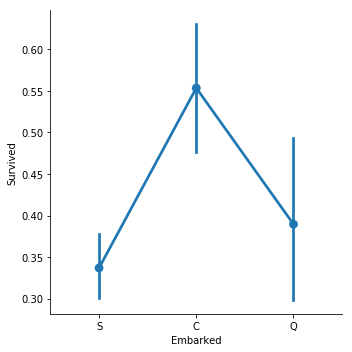

In [0]:
print(pd.crosstab(data.Embarked,data.Survived,margins=True))
sns.factorplot(x='Embarked',y='Survived',data=data,kind='bar')
sns.factorplot(x='Embarked',y='Survived',data=data,kind='point')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


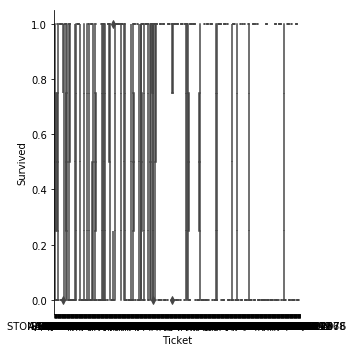

In [0]:

sns.factorplot(x='Ticket',y='Survived',data=data,kind='box')

In [0]:
kids=[data[data['Age']<=20]['Age']]    #0 -20
youth=[i for i in data.Age if i<60 and i>20]   # 20-60
elder=[data[data['Age']>=60]['Age']]   #60+
data2=data.copy()
# data2['kids']=kids
data2.Age=data2.Age.replace(kids,'kids')
data2.Age=data2.Age.replace(youth,'youth')
data2.Age=data2.Age.replace(elder,'elder')
# data2=data2.assign(kids)

print(pd.crosstab([data2.Survived,data2.Sex],data2.Age,margins=True))
print("#"*150)
print(pd.crosstab([data2.Survived,data2.Sex],[data2.Pclass,data2.Age],margins=True))

Age              elder  kids  youth  All
Survived Sex                            
0        female      0    24     40   64
         male       19    73    268  360
1        female      4    53    140  197
         male        3    29     61   93
All                 26   179    509  714
######################################################################################################################################################
Pclass              1                2                3             All
Age             elder kids youth elder kids youth elder kids youth     
Survived Sex                                                           
0        female     0    1     2     0    0     6     0   23    32   64
         male      12    3    46     3    9    72     4   61   150  360
1        female     3   13    66     0   16    52     1   24    22  197
         male       2    4    34     1   10     4     0   15    23   93
All                17   21   148     4   35   134     5  1

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


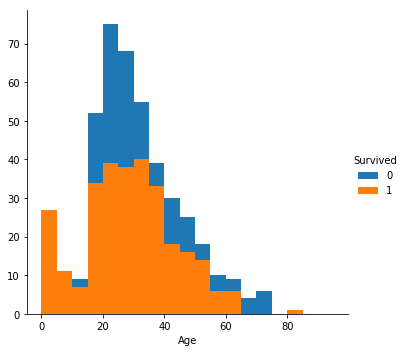

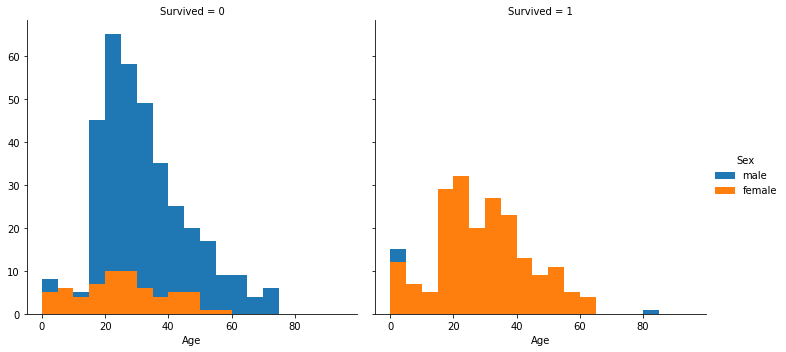

In [0]:
bins=np.arange(0,100,5)
sns.FacetGrid(data,hue='Survived',size=5)\
   .map(plt.hist,'Age',bins=bins)\
   .add_legend()
bins2=[0,1]
sns.FacetGrid(data,col='Survived',hue='Sex',size=5)\
   .map(plt.hist,'Age',bins=bins)\
   .add_legend()

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


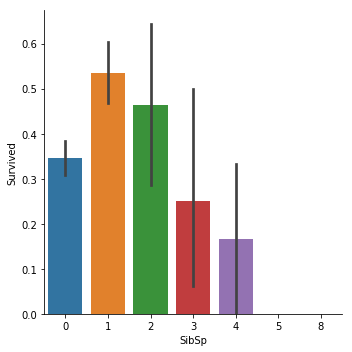

In [0]:
print(pd.crosstab(data.SibSp,data.Survived))
sns.factorplot(x='SibSp',y='Survived',data=data,kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0


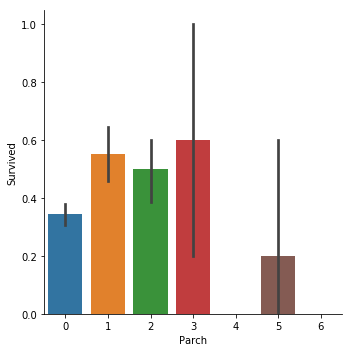

In [0]:
sns.factorplot(x='Parch',y='Survived',data=data,kind='bar')
print(pd.crosstab(data.Survived,data.Parch))

Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


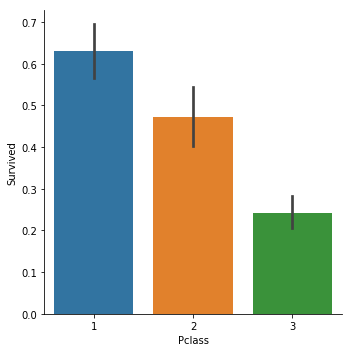

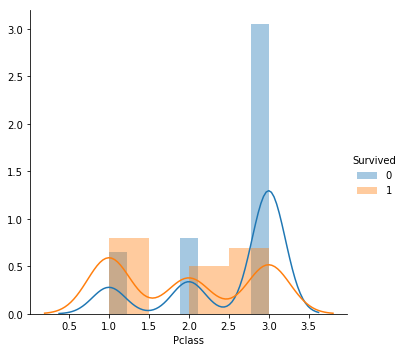

In [0]:
print(pd.crosstab(data.Survived,data.Pclass,margins=True))
sns.factorplot(x='Pclass',y='Survived',data=data,kind='bar')
sns.FacetGrid(data2,hue='Survived',size=5)\
   .map(sns.distplot,'Pclass')\
   .add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


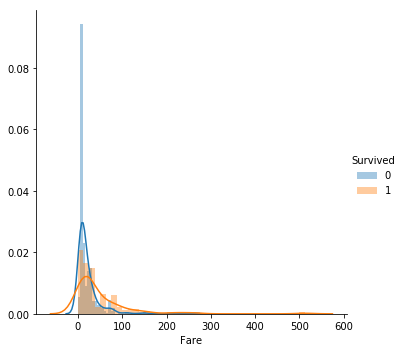

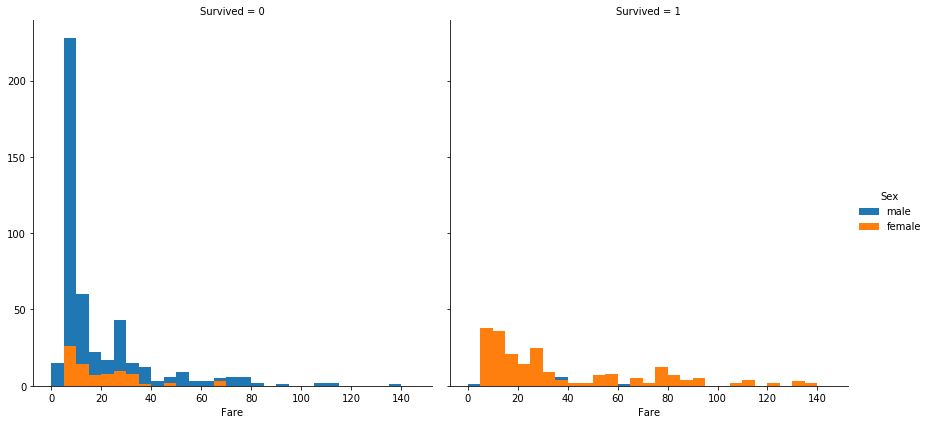

In [0]:
# sns.factorplot(x='Fare',y='Survived',data=data,kind='point')
# print(pd.crosstab(data.Fare,data.Survived))
sns.FacetGrid(data,hue='Survived',size=5)\
   .map(sns.distplot,'Fare')\
   .add_legend()
bins3=np.arange(0,150,5)
sns.FacetGrid(data,col='Survived',hue='Sex',size=6)\
   .map(plt.hist,'Fare',bins=bins3)\
   .add_legend()

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


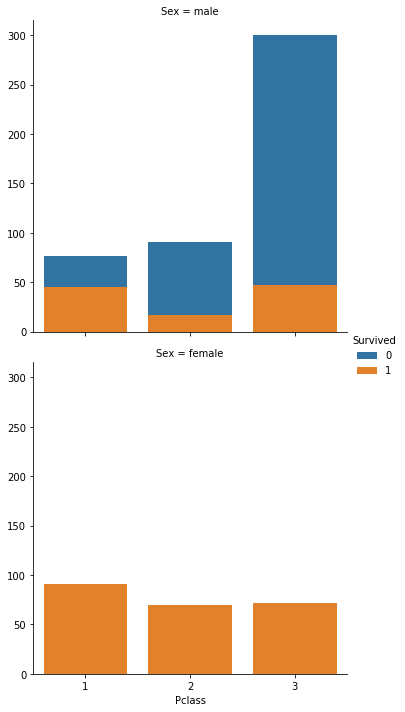

In [0]:
# print(data.Fare.describe())
print(pd.crosstab([data.Survived,data.Sex],data.Pclass,margins=True))

# plt.scatter(data=data,x='Age',y='Survived')
# sns.boxplot(data=data)
# sns.distplot(data.Age)
# plt.figure(1,figsize=(20,8))
# plt.xlim=(0,0)
# sns.factorplot(x='Fare',y='Survived',data=data,kind='point')
# bins=np.arange(0,50,2)
sns.FacetGrid(data,hue='Survived',row='Sex',size=5)\
   .map(sns.countplot,'Pclass')\
   .add_legend()

In [0]:
print(pd.crosstab([data.Survived,data.Sex],data.Age,margins=True))

Age              0.42  0.67  0.75  0.83  0.92  ...  70.5  71.0  74.0  80.0  All
Survived Sex                                   ...                             
0        female     0     0     0     0     0  ...     0     0     0     0   64
         male       0     0     0     0     0  ...     1     2     1     0  360
1        female     0     0     2     0     0  ...     0     0     0     0  197
         male       1     1     0     2     1  ...     0     0     0     1   93
All                 1     1     2     2     1  ...     1     2     1     1  714

[5 rows x 89 columns]


In [0]:
data2['family']=data2.Parch+data2.SibSp
print(pd.crosstab([data2.Survived,data2.Sex],data2.family,margins=True))
print(pd.crosstab([data2.Survived,data2.family],data2.Pclass,margins=True))

family             0    1    2   3   4   5   6  7  10  All
Survived Sex                                              
0        female   27   16   11   3   9   5   5  2   3   81
         male    347   56   32   5   3  14   3  4   4  468
1        female   99   71   38  16   3   3   3  0   0  233
         male     64   18   21   5   0   0   1  0   0  109
All              537  161  102  29  15  22  12  6   7  891
Pclass             1    2    3  All
Survived family                    
0        0        51   68  255  374
         1        19   16   37   72
         2         6   10   27   43
         3         2    3    3    8
         4         0    0   12   12
         5         2    0   17   19
         6         0    0    8    8
         7         0    0    6    6
         10        0    0    7    7
1        0        58   36   69  163
         1        51   18   20   89
         2        18   21   20   59
         3         5   10    6   21
         4         2    1    0    3
         5 

In [0]:
print(pd.crosstab([data2.Survived,data2.Sex],data2.Embarked,margins=True))

Embarked           C   Q    S  All
Survived Sex                      
0        female    9   9   63   81
         male     66  38  364  468
1        female   64  27  140  231
         male     29   3   77  109
All              168  77  644  889


# **EDA Conclusion** 













**` Single Variate Analysis `**
*   Females survived more than male
*   Embarked from C has max. survival rate C>Q>S
*   We will not consider Cabin as lots of values are missing
*   Ticket is not related to survival
*   People from class 1 survived max 1>2>3
*   Most people's age is b/w 20-40,survived peiople's age is between 20-55 appox
*   People who had 1 sibling survived most 1>2>0>3>4
*   Parch 3 has max survival rate 3>1>2>0>5
*   People survived paid fare between 10 -80 approx,people not survived paid mostly 8-15 fare price 


---

**`Multiple Variate Analysis`**
*   In class 1 almost every female survived,mostly males died in class 3
*   Youth females survived most,no elder female died
*   Mostly male elder,kids died in class 1
*   Females which have 0 family member survived mostly,male which have 0 family member died most.
*  Families in class 1 survived mostly
*  People Embarked from S survived mostly


# KNN

 Maximum Accuracy on train data with cross validation 81.86316613996706
Accuracy on test dataset with k deteremined by train dataset 81.71641791044776
R2 score 0.21833333333333327


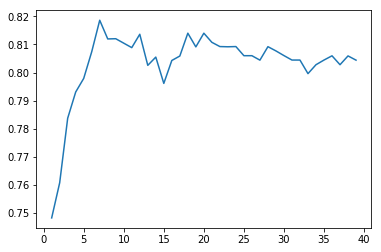

In [0]:
warnings.filterwarnings('ignore')
scores=[]
kk=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train,y_train)
    scores.append(np.mean(cross_val_score(knn,x_train,y_train,cv=15,scoring='accuracy')))
    kk.append(k)

plt.xlabel=('K')
plt.ylabel=('Score')
plt.plot(kk,scores)    
print(" Maximum Accuracy on train data with cross validation",np.amax(scores)*100)
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy on test dataset with k determined by train dataset",accuracy_score(y_pred,y_test)*100)
#KNN accuracy 81.71% on test dataset



# **Naive Bayes**

In [0]:
# alph=[]
# sco=[]

bb=GaussianNB()
bb.fit(x_train,y_train)
by_pred=bb.predict(x_test)
print(accuracy_score(by_pred,y_test))

# Bernoulli will not work here as it is designed for bool features
# 78.73% accuracy on test set


0.7873134328358209
R2 score 0.09071428571428564


# Logistic **Regression**

In [0]:
parameter_lr={'penalty':('l1','l2'),'C':[0.29,0.25,0.21,0.2,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]}
log_reg=LogisticRegression()
lr_gs=GridSearchCV(log_reg,parameter_lr,cv=10)
lr_gs.fit(x_train,y_train)
# print(lr_gs.cv_results_)
print(lr_gs.best_estimator_)
print(lr_gs.best_score_)
reg=LogisticRegression(penalty='l1',C=0.2)
reg.fit(x_train,y_train)
reg_pred=reg.predict(x_test)

# print("R2 score",r2_score(y_test,reg_pred))
print("Accuracy score",accuracy_score(y_test,reg_pred))
#l1->79.850 C=0.2
#l2->79.477 C=0.1


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8025682182985554
Accuracy score 0.7985074626865671


# **SVM**

In [0]:

parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.29,0.25,0.21,0.2,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]}
svc = SVC(gamma="scale")
svc_clf=GridSearchCV(svc,parameters,cv=10)
svc_clf.fit(x_train,y_train)
# print(svc_clf.cv_results_)
print(svc_clf.best_estimator_)
print(svc_clf.best_score_)

svc=SVC(C=1,kernel='rbf')
svc.fit(x_train,y_train)
# print(svc.support_vectors_)
svc_pred=svc.predict(x_test)
print("Accuracy score on test data",accuracy_score(svc_pred,y_test)*100) #81.34
#sigmoid 71
#rbf      82.92
#poly   81

SVC(C=0.29, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8154093097913323
Accuracy score on test data 81.34328358208955


# **Decision Tree**

In [0]:
DT=DecisionTreeClassifier(random_state=0)
parameter_DT={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8],'max_features':['auto','log2'],'min_samples_split':[5,4,3,2],'min_samples_leaf':[1,2,3,4,5]}
DT_grid=GridSearchCV(DT,parameter_DT,cv=15)
DT_grid.fit(x_train,y_train)
# print(DT_grid.cv_results_)
print(DT_grid.best_estimator_)
print(DT_grid.best_score_)
DT2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
DT2.fit(x_train,y_train)
DT_pred=DT2.predict(x_test)

print(accuracy_score(y_test,DT_pred)*100)#81.71



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
0.8170144462279294
81.71641791044776


# **Bagging Classifier(DecisionTree)**

In [0]:
from sklearn.ensemble import BaggingClassifier
kb_parameter={'n_estimators':[30,50,70,90,100,130,150],'max_features':[0.1,0.3,0.4,0.5,0.6,0.70,0.80,0.9]}
para_dt2={'criterion':['gini','entropy'],'max_depth':[5,10,14,20,24,26,30,35,40,50,70,100],'max_features':['auto','sqrt','log2',0.1,0.3,0.8],'min_samples_leaf':[1,4,7,10,15,20,25,30,50,70]}
Dt2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
# dt2grid=GridSearchCV(Dt2,para_dt2,cv=10,scoring='accuracy')
# dt2grid.fit(x_train,y_train)
# print(dt2grid.best_estimator_)
# print(dt2grid.best_score_)
# kb=BaggingClassifier(Dt2,random_state=2)
# kb_grid=GridSearchCV(kb,kb_parameter,cv=10,scoring='accuracy')
# kb_grid.fit(x_train,y_train)
# print(kb_grid.best_estimator_)
# print(kb_grid.best_score_)
kb2=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=0.8,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=2,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=1.0, n_estimators=150, n_jobs=None,
                  oob_score=False, random_state=2, verbose=0, warm_start=False)
kb2.fit(x_train,y_train)
kb_pred=kb2.predict(x_test)
print(accuracy_score(y_test,kb_pred))#83.20

0.832089552238806


# **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# ran_cl=RandomForestClassifier(random_state=0,n_jobs=-1)
# parameter_rf={'n_estimators':[20,40,60,80,100,140,180,200,220,250,260,280,300],'max_features':['log2','sqrt',0.1,0.3,0.5],'min_samples_leaf':[5,10,7,4,20,50,100,70,120]}
# ran_gs=GridSearchCV(ran_cl,parameter_rf,cv=10,scoring='accuracy')
# ran_gs.fit(x_train,y_train)
# print(ran_gs.best_score_)
# print(ran_gs.best_estimator_)
ran_cl2=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
# # # # print(np.mean(ran_cross))
ran_cl2.fit(x_train,y_train)
ran_pred=ran_cl2.predict(x_test)
print(accuracy_score(y_test,ran_pred))
# accu_meter=[]
# param=[]
# def test_parameter(x,y):
#     for i in y:
#         rad=RandomForestClassifier(n_estimators=i,random_state=0)
#         rad.fit(x_train,y_train)
#         pred1=rad.predict(x_test)
#         accuracy=accuracy_score(y_test,pred1)
#         accu_meter.append(accuracy)
#         param.append(i)
    
#     plt.grid()
#     plt.xlabel=str(x)
#     plt.ylabel='accuracy'
#     plt.plot(param,accu_meter)
# test_parameter('n_estimators',[20,40,60,80,100,140,180,200,220,250,260,280,300])
# ran_rr=RandomizedSearchCV(ran_cl,parameter_rf,cv=10)
# ran_rr.fit(x_train,y_train)
# print(ran_rr.best_estimator_)
# print(ran_rr.best_score_)

0.8395522388059702


# **BaggingClassifier(KNN)**

In [0]:
from sklearn.ensemble import BaggingClassifier
kb_parameter={'n_estimators':[30,50,70,90,100,130,150],'max_features':[0.1,0.3,0.4,0.5,0.6,0.70,0.80,0.9]}
para_knn={'n_neighbors':list(range(8,100)),'weights':['uniform','distance'],'algorithm':['auto','kd_tree','ball_tree']}
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')
# kgrid=GridSearchCV(knn,para_knn,cv=10,scoring='accuracy')
# kgrid.fit(x_train,y_train)
# print(kgrid.best_estimator_)
# print(kgrid.best_score_)
# kb=BaggingClassifier(knn,random_state=2)
# kb_grid=GridSearchCV(kb,kb_parameter,cv=10,scoring='accuracy')
# kb_grid.fit(x_train,y_train)
# print(kb_grid.best_estimator_)
# print(kb_grid.best_score_)
kb2=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=-1,
                                                      n_neighbors=12, p=2,
                                                      weights='distance'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=1.0, n_estimators=80, n_jobs=-1,
                  oob_score=False, random_state=2, verbose=0, warm_start=False)
kb2.fit(x_train,y_train)
kb_pred=kb2.predict(x_test)
print(accuracy_score(y_test,kb_pred))#84.32

0.8432835820895522


# **Gradient Boosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_para={'n_estimators':[80,100,120,150,180,200,220],'learning_rate':[0.1,0.001,0.01,0.2],'subsample':[0.8,0.9,0.5],
          'max_depth':[5,8,10,13,16,19,22],'max_features':[0.8,0.9,'sqrt','auto','log2']}
GBC=GradientBoostingClassifier(random_state=0,tol=0.01,n_iter_no_change=100)
GBC_grid=GridSearchCV(GBC,GBC_para,cv=10,scoring='accuracy')
GBC_grid.fit(x_train,y_train)
print(GBC_grid.best_estimator_)
print(GBC_grid.best_score_)
# GBC_pred=GBC.predict(x_test)
# print(GBC.score(x_test,y_test))

# **AdaBoost**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls=AdaBoostClassifier(random_state=0,base_estimator=DT2)
parameter_ada={ 'n_estimators':[60,70,80,90,100,130,150,200,220,240,260,280],'learning_rate':[0.00001,0.0001,0.1,0.001,0.5,1.0,2.0,1.5]}
ada_gs=GridSearchCV(ada_cls,parameter_ada,cv=10,scoring='accuracy')
ada_gs.fit(x_train,y_train)
print(ada_gs.best_estimator_)
print(ada_gs.best_score_)

ada_cls2=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='log2',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                                                         splitter='best'),
                   learning_rate=0.001, n_estimators=220, random_state=0)
ada_cls2.fit(x_train,y_train)
ada_parameter={'n_estimators':[30,50,70,90,100,130,150],'max_features':[0.1,0.3,0.4,0.5,0.6,0.70,0.80,0.9]}

# ada_bag=BaggingClassifier(ada_cls2,random_state=2)
# kb_grid=GridSearchCV(ada_bag,ada_parameter,cv=10,scoring='accuracy')
# kb_grid.fit(x_train,y_train)
# print(kb_grid.best_estimator_)
# print(kb_grid.best_score_)             
print(ada_cls2.feature_importances_)
# print(ada_cls2.estimators_)
# print(ada_cls2.estimator_errors_)
print(accuracy_score(y_test,ada_cls2.predict(x_test))) #84.70

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='log2',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                              

# **XGBoost**

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='rmse', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
0.7897271268057785
0.832089552238806


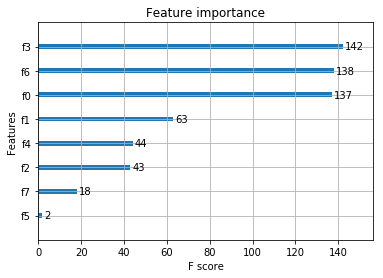

In [0]:
import xgboost as xgb
from xgboost import plot_importance

xgb_parameter={'eta':[0.1,0.3,0.01,0.2,0.4],'max_depth':[6,8,10,15,20,40,30,50,70,100,140,150,190,210]}
xgb_cls=xgb.XGBClassifier(eval_metric='rmse')
xgb_grid=GridSearchCV(xgb_cls,xgb_parameter,cv=10,scoring='accuracy')
xgb_grid.fit(x_train,y_train)
print(xgb_grid.best_estimator_)
print(xgb_grid.best_score_)

xgb_cls.fit(x_train,y_train)
print(accuracy_score(y_test,xgb_cls.predict(x_test)))
plot_importance(xgb_cls)
plt.show()
#83.20


# x_real=data2[['SibSp','Fare','Age']]
# x_real.Age.fillna(np.mean(data2.Age),inplace=True)
# y_real=data.Survived
# y_real=np.array(y).reshape(len(y),1) 
# xx,xt,yy,yt=train_test_split(x_real,y_real,test_size=0.3,random_state=0)
# xgb_parameter={'eta':[0.1,0.3,0.01,0.2,0.4],'max_depth':[6,8,10,15,20,40,30,50,70,100,140,150,190,210],'n_estimators':[30,40,60,100,130,160,170,200,240,220]}
# xgb_cls=xgb.XGBClassifier(eval_metric='rmse')
# xgb_grid=GridSearchCV(xgb_cls,xgb_parameter,cv=10,scoring='accuracy')
# xgb_grid.fit(xx,yy)
# print(xgb_grid.best_estimator_)
# print(xgb_grid.best_score_)
# xgb_cls2=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, eta=0.1,
#               eval_metric='rmse', gamma=0, learning_rate=0.1, max_delta_step=0,
#               max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
#               n_jobs=1, nthread=None, objective='binary:logistic',
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               seed=None, silent=None, subsample=1, verbosity=1)
# xgb_cls2.fit(xx,yy)
# print('Final Accuracy',accuracy_score(yt,xgb_cls2.predict(xt)))

# **Accuracy card**




*   KNN                                   81.71
*   Naive Bayes                     78.73
*   Logistic Regression        79.85
*   SVM                                  81.34          
*  Decision Trees        81.71
*   Random Forest 83.95
*   Bagging Classifier(Decision tree) 83.20
*   Bagging Classifier(KNN) 84.32
*   AdaBoost  84.70





